In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import scipy.stats as sps 
%matplotlib inline

In [2]:
KS=pd.read_csv("KS_FDR_AllVariables.csv")

In [3]:
data= pd.read_csv("alldata.csv")

In [4]:
data.head()

,Unnamed: 0,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,...,Days_ssn_fulladdress,Days_ssn_namedob,Days_ssn_homephone,Days_fulladdress_namedob,Days_fulladdress_homephone,Days_namedob_homephone,Days_firstname_ssn,Days_lastname_ssn,Days_firstname_fulladdress,Days_lastname_address
0,1,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1.797504e+09,...,365,365,365,365,365,365,365,365,365,365
1,2,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4.164239e+09,...,365,365,365,365,365,365,365,365,365,365
2,3,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,2.165376e+08,...,365,365,365,365,365,365,365,365,365,365
3,4,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,1.321442e+08,...,365,365,365,365,365,365,365,365,365,365
4,5,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6.101082e+09,...,365,365,365,365,365,365,365,365,365,365


In [6]:
KS.tail(15)

,field,ks,FDR,rank_ks,rank_FDR,average_rank
88,lastnamefulladdress_1_count,0.006331,0.045224,11.0,15.0,13.0
89,namedobhomephone_1_count,0.005433,0.044474,9.0,13.0,11.0
90,fulladdressnamedob_1_count,0.005444,0.044307,10.0,12.0,11.0
91,ssnhomephone_1_count,0.005427,0.044557,8.0,14.0,11.0
92,nameDOB,0.014123,0.034730,15.5,3.5,9.5
93,namedob,0.014123,0.034730,15.5,3.5,9.5
94,ssnfulladdress_1_count,0.005364,0.044224,7.0,11.0,9.0
95,firstnamefulladdress_0_count,0.003257,0.043058,6.0,10.0,8.0
96,fulladdress,0.013260,0.033231,14.0,2.0,8.0
97,lastnamefulladdress_0_count,0.002086,0.041976,5.0,9.0,7.0


In [7]:
KS.reset_index(drop=True)

,field,ks,FDR,rank_ks,rank_FDR,average_rank
0,fraud_label,1.000000,1.000000,103.0,103.0,103.00
1,Days_fulladdress,0.328941,0.354043,102.0,102.0,102.00
2,fulladdress_30_count,0.327827,0.351212,101.0,101.0,101.00
3,fulladdress_14_count,0.317954,0.341218,100.0,100.0,100.00
4,fulladdress_7_count,0.298436,0.319813,99.0,99.0,99.00
5,fulladdress_3_count,0.276319,0.298409,98.0,98.0,98.00
6,fulladdress_1_count,0.246519,0.267844,97.0,97.0,97.00
7,Days_ssn,0.224871,0.251437,96.0,96.0,96.00
8,ssn_30_count,0.224655,0.251187,95.0,95.0,95.00
9,Days_firstname_ssn,0.224081,0.250521,93.0,92.5,92.75


In [8]:
nvars=len(KS)
num_keep=round(nvars/5*2)
num_keep

41

In [9]:
KS['field']

0                        fraud_label
1                   Days_fulladdress
2               fulladdress_30_count
3               fulladdress_14_count
4                fulladdress_7_count
5                fulladdress_3_count
6                fulladdress_1_count
7                           Days_ssn
8                       ssn_30_count
9                 Days_firstname_ssn
10              lastnamessn_30_count
11             firstnamessn_30_count
12                 Days_lastname_ssn
13        Days_fulladdress_homephone
14     fulladdresshomephone_30_count
15                      Days_namedob
16                  namedob_30_count
17                  Days_ssn_namedob
18               ssnnamedob_30_count
19                      ssn_14_count
20     fulladdresshomephone_14_count
21                  namedob_14_count
22             firstnamessn_14_count
23               ssnnamedob_14_count
24              lastnamessn_14_count
25      fulladdresshomephone_7_count
26                   namedob_7_count
2

In [28]:
cols_keep=list(KS['field'][0:num_keep])
type(cols_keep)

list

In [29]:
cols_keep

['fraud_label',
 'Days_fulladdress',
 'fulladdress_30_count',
 'fulladdress_14_count',
 'fulladdress_7_count',
 'fulladdress_3_count',
 'fulladdress_1_count',
 'Days_ssn',
 'ssn_30_count',
 'Days_firstname_ssn',
 'lastnamessn_30_count',
 'firstnamessn_30_count',
 'Days_lastname_ssn',
 'Days_fulladdress_homephone',
 'fulladdresshomephone_30_count',
 'Days_namedob',
 'namedob_30_count',
 'Days_ssn_namedob',
 'ssnnamedob_30_count',
 'ssn_14_count',
 'fulladdresshomephone_14_count',
 'namedob_14_count',
 'firstnamessn_14_count',
 'ssnnamedob_14_count',
 'lastnamessn_14_count',
 'fulladdresshomephone_7_count',
 'namedob_7_count',
 'ssn_7_count',
 'firstnamessn_7_count',
 'homephone_3_count',
 'ssnnamedob_7_count',
 'lastnamessn_7_count',
 'homephone_7_count',
 'fulladdress_0_count',
 'fulladdresshomephone_3_count',
 'homephone_14_count',
 'namedob_3_count',
 'ssn_3_count',
 'homephone_1_count',
 'firstnamessn_3_count',
 'lastnamessn_3_count']

In [31]:
vars_keep=data.filter(cols_keep, axis=1)
vars_keep.shape

(1000000, 42)

In [32]:
vars_keep.head()

,record,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_14_count,fulladdress_7_count,fulladdress_3_count,fulladdress_1_count,Days_ssn,ssn_30_count,...,lastnamessn_7_count,homephone_7_count,fulladdress_0_count,fulladdresshomephone_3_count,homephone_14_count,namedob_3_count,ssn_3_count,homephone_1_count,firstnamessn_3_count,lastnamessn_3_count
0,1,0,365,1,1,1,1,1,365,1,...,1,1,1,1,1,1,1,1,1,1
1,2,1,365,1,1,1,1,1,365,1,...,1,1,1,1,1,1,1,1,1,1
2,3,0,365,1,1,1,1,1,365,1,...,1,1,1,1,1,1,1,1,1,1
3,4,0,365,1,1,1,1,1,365,1,...,1,1,1,1,1,1,1,1,1,1
4,5,0,365,1,1,1,1,1,365,1,...,1,1,1,1,1,1,1,1,1,1


## Drop first week of data

In [16]:
data[data['date']=='2016-01-08']

,Unnamed: 0,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,...,Days_ssn_fulladdress,Days_ssn_namedob,Days_ssn_homephone,Days_fulladdress_namedob,Days_fulladdress_homephone,Days_namedob_homephone,Days_firstname_ssn,Days_lastname_ssn,Days_firstname_fulladdress,Days_lastname_address
19276,19277,19277,2016-01-08,792198899,RAZZJEXRA,RXZZXMXU,2373 XZMUJ LN,8391,19200919,5.097802e+09,...,365,365,365,365,2,365,365,365,365,365
19277,19278,19278,2016-01-08,657678631,EZREXATEU,AXUJZEE,3758 XRZEA ST,27654,19070626,6.035129e+09,...,365,365,365,365,365,365,365,365,365,365
19278,19279,19279,2016-01-08,753831437,SAMXMEZMS,UAMJAZMZ,4648 USMSU RD,21957,19070626,9.826049e+09,...,365,365,365,365,365,365,365,365,365,365
19279,19280,19280,2016-01-08,51307926,SETJATEAU,EJASSXXZ,2600 USSUA LN,49293,19940112,6.503744e+08,...,365,365,365,365,365,365,365,365,365,365
19280,19281,19281,2016-01-08,431433821,UAXERMMXZ,SUSAUMUR,7198 ERZJU LN,88571,20160326,6.923049e+09,...,365,365,365,365,365,365,365,365,365,365
19281,19282,19282,2016-01-08,108169834,XETRJXESR,ERJSAXA,2995 ETXZM BLVD,48526,19100406,4.118060e+09,...,365,365,365,365,365,365,365,365,365,365
19282,19283,19283,2016-01-08,512978486,SXXSZJMM,ETZSJJJM,3131 SASAM CT,31506,19070626,6.304634e+09,...,365,365,365,365,365,365,365,365,365,365
19283,19284,19284,2016-01-08,713665805,TRZERSM,EZJZZSSA,3614 EXSUZ ST,33384,19310618,7.518993e+09,...,365,365,365,365,365,365,365,365,365,365
19284,19285,19285,2016-01-08,531257967,UUXJMUTJ,RJURSTXJ,2595 RMAZS ST,65790,19070626,1.928500e+04,...,365,365,365,365,365,365,365,365,365,365
19285,19286,19286,2016-01-08,714438188,SUXZRSUZT,RAAZURZA,3730 EAMUT PL,5186,19710909,4.277888e+09,...,365,365,365,365,365,365,365,365,365,365


In [33]:
vdata=vars_keep[vars_keep['record']>=19277]

In [34]:
vdata.head()

,record,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_14_count,fulladdress_7_count,fulladdress_3_count,fulladdress_1_count,Days_ssn,ssn_30_count,...,lastnamessn_7_count,homephone_7_count,fulladdress_0_count,fulladdresshomephone_3_count,homephone_14_count,namedob_3_count,ssn_3_count,homephone_1_count,firstnamessn_3_count,lastnamessn_3_count
19276,19277,1,2,4,4,4,3,1,365,1,...,1,5,1,3,5,1,1,1,1,1
19277,19278,0,365,1,1,1,1,1,365,1,...,1,8,1,1,8,1,1,2,1,1
19278,19279,0,365,1,1,1,1,1,365,1,...,1,1,1,1,1,1,1,1,1,1
19279,19280,0,365,1,1,1,1,1,365,1,...,1,2,1,1,2,1,1,1,1,1
19280,19281,0,365,1,1,1,1,1,365,1,...,1,1,1,1,1,1,1,1,1,1


In [37]:
Y=vdata['fraud_label']

In [38]:
vdata=vdata.drop(columns=['record','fraud_label'])

In [39]:
vdata.shape

(980724, 40)

## Feature Selection

In [35]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [40]:
%%time
model= LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=3, verbose=2, n_jobs=-1, scoring='roc_auc')
rfecv.fit(vdata,Y)

CPU times: user 2min 29s, sys: 3.54 s, total: 2min 32s
Wall time: 12min 58s


In [41]:
print('Optimal number of feature:', rfecv.n_features_)

Optimal number of feature: 40


In [42]:
var_selected=pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), vdata.columns)),
                         columns=['ranking','variable'])
pd.options.display.max_rows = 150
print(var_selected)

    ranking                       variable
0         1             Days_firstname_ssn
1         1               Days_fulladdress
2         1     Days_fulladdress_homephone
3         1              Days_lastname_ssn
4         1                   Days_namedob
5         1                       Days_ssn
6         1               Days_ssn_namedob
7         1          firstnamessn_14_count
8         1          firstnamessn_30_count
9         1           firstnamessn_3_count
10        1           firstnamessn_7_count
11        1            fulladdress_0_count
12        1           fulladdress_14_count
13        1            fulladdress_1_count
14        1           fulladdress_30_count
15        1            fulladdress_3_count
16        1            fulladdress_7_count
17        1  fulladdresshomephone_14_count
18        1  fulladdresshomephone_30_count
19        1   fulladdresshomephone_3_count
20        1   fulladdresshomephone_7_count
21        1             homephone_14_count
22        1

In [43]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
rfecv.grid_scores_

array([0.60555477, 0.73458519, 0.74881649, 0.74905098, 0.74880423,
       0.74890627, 0.75623288, 0.75623525, 0.76477444, 0.7648583 ,
       0.76476417, 0.76472788, 0.77206777, 0.77206574, 0.77210638,
       0.77277667, 0.77279723, 0.77279467, 0.77279344, 0.77279807,
       0.77280438, 0.77280935, 0.77280753, 0.77443605, 0.77441772,
       0.774394  , 0.77439275, 0.7767904 , 0.77712126, 0.77841563,
       0.77849022, 0.77919865, 0.78128095, 0.78204464, 0.78257492,
       0.78273118, 0.7846838 , 0.78472021, 0.78020769, 0.78511942])

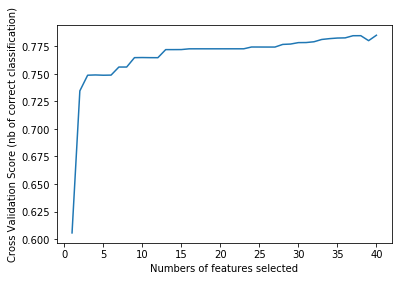

In [45]:
plt.figure()
plt.xlabel("Numbers of features selected")
plt.ylabel("Cross Validation Score (nb of correct classification)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)

# Choose to keep the first 20 of KS FDR ranking

In [62]:
mydata=data[vars_keep['record']>=19277]

In [61]:
mydata.head()

,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_14_count,fulladdress_7_count,fulladdress_3_count,fulladdress_1_count,Days_ssn,ssn_30_count,Days_firstname_ssn,...,firstnamessn_30_count,Days_lastname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,Days_namedob,namedob_30_count,Days_ssn_namedob,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count
19276,1,2,4,4,4,3,1,365,1,365,...,1,365,2,4,365,1,365,1,1,4
19277,0,365,1,1,1,1,1,365,1,365,...,1,365,365,1,365,1,365,1,1,1
19278,0,365,1,1,1,1,1,365,1,365,...,1,365,365,1,365,1,365,1,1,1
19279,0,365,1,1,1,1,1,365,1,365,...,1,365,365,1,365,1,365,1,1,1
19280,0,365,1,1,1,1,1,365,1,365,...,1,365,365,1,365,1,365,1,1,1


In [63]:
mydata=mydata[['fraud_label','record','Days_fulladdress','fulladdress_30_count','fulladdress_14_count',
              'fulladdress_7_count','fulladdress_3_count','fulladdress_1_count','Days_ssn',
              'ssn_30_count','Days_firstname_ssn','lastnamessn_30_count','firstnamessn_30_count',
              'Days_lastname_ssn','Days_fulladdress_homephone','fulladdresshomephone_30_count',
              'Days_namedob','namedob_30_count','Days_ssn_namedob','ssnnamedob_30_count',
              'ssn_14_count','fulladdresshomephone_14_count']]

In [64]:
mydata.head()

,fraud_label,record,Days_fulladdress,fulladdress_30_count,fulladdress_14_count,fulladdress_7_count,fulladdress_3_count,fulladdress_1_count,Days_ssn,ssn_30_count,...,firstnamessn_30_count,Days_lastname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,Days_namedob,namedob_30_count,Days_ssn_namedob,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count
19276,1,19277,2,4,4,4,3,1,365,1,...,1,365,2,4,365,1,365,1,1,4
19277,0,19278,365,1,1,1,1,1,365,1,...,1,365,365,1,365,1,365,1,1,1
19278,0,19279,365,1,1,1,1,1,365,1,...,1,365,365,1,365,1,365,1,1,1
19279,0,19280,365,1,1,1,1,1,365,1,...,1,365,365,1,365,1,365,1,1,1
19280,0,19281,365,1,1,1,1,1,365,1,...,1,365,365,1,365,1,365,1,1,1


In [52]:
mydata.shape

(980724, 21)

## Z scale 20 variables we selected

In [65]:
cols = list(mydata.columns)
cols.remove('fraud_label')
cols.remove('record')
cols

['Days_fulladdress',
 'fulladdress_30_count',
 'fulladdress_14_count',
 'fulladdress_7_count',
 'fulladdress_3_count',
 'fulladdress_1_count',
 'Days_ssn',
 'ssn_30_count',
 'Days_firstname_ssn',
 'lastnamessn_30_count',
 'firstnamessn_30_count',
 'Days_lastname_ssn',
 'Days_fulladdress_homephone',
 'fulladdresshomephone_30_count',
 'Days_namedob',
 'namedob_30_count',
 'Days_ssn_namedob',
 'ssnnamedob_30_count',
 'ssn_14_count',
 'fulladdresshomephone_14_count']

In [66]:
zsvar=mydata.copy()

In [67]:
from scipy.stats import zscore

In [68]:
## z scale 20 variables we selected
for col in cols:
    zsvar[col]=zscore(zsvar[col],axis=None)

In [69]:
zsvar.head()

,fraud_label,record,Days_fulladdress,fulladdress_30_count,fulladdress_14_count,fulladdress_7_count,fulladdress_3_count,fulladdress_1_count,Days_ssn,ssn_30_count,...,firstnamessn_30_count,Days_lastname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,Days_namedob,namedob_30_count,Days_ssn_namedob,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count
19276,1,19277,-3.230865,4.607631,4.842310,5.073931,3.617445,-0.049801,0.396435,-0.099762,...,-0.098737,0.393996,-3.464852,5.758508,0.403811,-0.102841,0.390935,-0.097878,-0.072852,6.095677
19277,0,19278,0.407271,-0.102765,-0.079516,-0.067384,-0.058108,-0.049801,0.396435,-0.099762,...,-0.098737,0.393996,0.379935,-0.095718,0.403811,-0.102841,0.390935,-0.097878,-0.072852,-0.070587
19278,0,19279,0.407271,-0.102765,-0.079516,-0.067384,-0.058108,-0.049801,0.396435,-0.099762,...,-0.098737,0.393996,0.379935,-0.095718,0.403811,-0.102841,0.390935,-0.097878,-0.072852,-0.070587
19279,0,19280,0.407271,-0.102765,-0.079516,-0.067384,-0.058108,-0.049801,0.396435,-0.099762,...,-0.098737,0.393996,0.379935,-0.095718,0.403811,-0.102841,0.390935,-0.097878,-0.072852,-0.070587
19280,0,19281,0.407271,-0.102765,-0.079516,-0.067384,-0.058108,-0.049801,0.396435,-0.099762,...,-0.098737,0.393996,0.379935,-0.095718,0.403811,-0.102841,0.390935,-0.097878,-0.072852,-0.070587


In [58]:
zsvar.describe()

,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_14_count,fulladdress_7_count,fulladdress_3_count,fulladdress_1_count,Days_ssn,ssn_30_count,Days_firstname_ssn,...,firstnamessn_30_count,Days_lastname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,Days_namedob,namedob_30_count,Days_ssn_namedob,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count
count,980724.000000,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,...,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05,9.807240e+05
mean,0.014440,4.080431e-17,1.212537e-16,8.114494e-17,1.225868e-16,3.836996e-17,-1.832137e-16,2.418119e-16,-2.125128e-16,-4.405011e-18,...,2.101074e-16,-2.119042e-16,-9.041864e-17,-9.621471e-18,-2.476080e-16,7.361005e-18,2.355522e-16,-1.541174e-16,6.103258e-17,-1.016630e-16
std,0.119297,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,-3.250910e+00,-1.027645e-01,-7.951579e-02,-6.738364e-02,-5.810769e-02,-4.980051e-02,-3.351340e+00,-9.976163e-02,-3.373066e+00,...,-9.873655e-02,-3.373516e+00,-3.486036e+00,-9.571755e-02,-3.287079e+00,-1.028410e-01,-3.399241e+00,-9.787767e-02,-7.285162e-02,-7.058723e-02
25%,0.000000,4.072707e-01,-1.027645e-01,-7.951579e-02,-6.738364e-02,-5.810769e-02,-4.980051e-02,3.964348e-01,-9.976163e-02,3.940600e-01,...,-9.873655e-02,3.939956e-01,3.799354e-01,-9.571755e-02,4.038106e-01,-1.028410e-01,3.909348e-01,-9.787767e-02,-7.285162e-02,-7.058723e-02
50%,0.000000,4.072707e-01,-1.027645e-01,-7.951579e-02,-6.738364e-02,-5.810769e-02,-4.980051e-02,3.964348e-01,-9.976163e-02,3.940600e-01,...,-9.873655e-02,3.939956e-01,3.799354e-01,-9.571755e-02,4.038106e-01,-1.028410e-01,3.909348e-01,-9.787767e-02,-7.285162e-02,-7.058723e-02
75%,0.000000,4.072707e-01,-1.027645e-01,-7.951579e-02,-6.738364e-02,-5.810769e-02,-4.980051e-02,3.964348e-01,-9.976163e-02,3.940600e-01,...,-9.873655e-02,3.939956e-01,3.799354e-01,-9.571755e-02,4.038106e-01,-1.028410e-01,3.909348e-01,-9.787767e-02,-7.285162e-02,-7.058723e-02
max,1.000000,4.072707e-01,4.543106e+01,4.749813e+01,4.963199e+01,5.323740e+01,6.000176e+01,3.964348e-01,6.367905e+01,3.940600e-01,...,6.551457e+01,3.939956e-01,3.799354e-01,5.649513e+01,4.038106e-01,6.502073e+01,3.909348e-01,6.557985e+01,6.848667e+01,5.953663e+01


In [59]:
zsvar.to_csv('vars_final_zscale.csv',index=False)

# split into oot, trte data (2016-11-01)

In [70]:
oot_df=zsvar[zsvar['record']>833508]
trte_df=zsvar[zsvar['record']<=833508]